<a href="https://colab.research.google.com/github/batoulal/SDA_Python/blob/main/%D8%A7%D9%84%D9%85%D8%B4%D8%A7%D8%B1%D9%8A%D8%B9_%D9%88%D8%A7%D9%84%D8%A8%D8%B1%D8%A7%D9%85%D8%AC_%D9%81%D9%8A_%D9%88%D9%83%D8%A7%D9%84%D8%A9_%D8%A7%D9%84%D8%AA%D9%86%D9%85%D9%8A%D8%A9_%D8%A7%D9%84%D8%A7%D8%AC%D8%AA%D9%85%D8%A7%D8%B9%D9%8A%D8%A9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **نظرة تحليلية على برامج وكالة التنمية الاجتماعية**
## فئة المشاركة: تحسين أداء البرامج والمبادرات
## مشاركة: بتول الحماد


### سبب اختيار المشروع
تمثل برامج وكالة التنمية الاجتماعية ركيزة أساسية في بناء مجتمع متماسك ومستدام، حيث تُعنى بتعزيز المشاركة المجتمعية، وتمكين الفئات المستهدفة مثل الشباب، المرأة، الأطفال، وكبار السن.

وتتميز هذه البرامج بشموليتها وتنوعها، مما يسمح بتلبية احتياجات شرائح واسعة من المجتمع، مع تحقيق أثر اجتماعي عميق ومستمر.

ويعزز اختيار هذه البرامج دعم التوجهات الوطنية في مجال التنمية البشرية والاجتماعية، من خلال إتاحة فرص التفاعل، التدريب، وبناء القدرات داخل بيئة محفّزة وآمنة. 💡🌍

##**تحضير البيئة البرمجية وتحميل المكتبات الأساسية**



In [ ]:
#تنزيل مكتبة للغة العربية
!pip install arabic_reshaper python-bidi
# اضافة المكتاب
import pandas as pd #  DataFrame مكتبة لتحليل البيانات على شكل
import numpy as np #مكتبة للعمليات الرياضية
import matplotlib.pyplot as plt #مكتبة لرسم الرسوم البيانية التقليدية
import arabic_reshaper # ترتيب الحروف العربية عشان ما تطلع متقطعة.
from bidi.algorithm import get_display #عرض النص العربي من اليمين لليسار بشكل سليم
import matplotlib.cm as cm   #مكتبة الالوان
import seaborn as sns # مكتبة الرسوم البيانية بتصاميم حديثة
from sklearn.linear_model import LinearRegression  # أداة من مكتبة الذكاء الاصطناعي + تُستخدم لإنشاء نموذج تنبؤي باستخدام الانحدار الخطي


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 11.8 MB/s eta 0:00:00


##**Excel قراءة بيانات المشروع من ملف**


In [ ]:
# قراءة الملف
df = pd.read_excel('/content/المشاريع والبرامج في وكالة التنمية الاجتماعية.xlsx')
# عرض أول صفوف للتأكد
df.head()

,الفئة,المشاريع,عدد المشاركين
0,الروابط الاجتماعية,الديوانية الاجتماعية,5984
1,الروابط الاجتماعية,رعاية و حقوق المسنين,607
2,الروابط الاجتماعية,ديوانية الحي,199
3,الروابط الاجتماعية,التواصل الاجتماعية,181
4,الروابط الاجتماعية,الملتقيات الاجتماعية,2


##**!تنظيف البيانات: البداية الذكية للتحليل**


In [ ]:
# إزالة الفراغات من أسماء الأعمدة
df.columns = df.columns.str.strip()
#  إزالة الفراغات من بداية ونهاية كل خلية نصية
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
#  طباعة شكل البيانات بعد التنظيف
df.head()

<ipython-input-7-e76caa4c9549>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,الفئة,المشاريع,عدد المشاركين
0,الروابط الاجتماعية,الديوانية الاجتماعية,5984
1,الروابط الاجتماعية,رعاية و حقوق المسنين,607
2,الروابط الاجتماعية,ديوانية الحي,199
3,الروابط الاجتماعية,التواصل الاجتماعية,181
4,الروابط الاجتماعية,الملتقيات الاجتماعية,2


##**إجمالي المشاركين حسب الفئة**



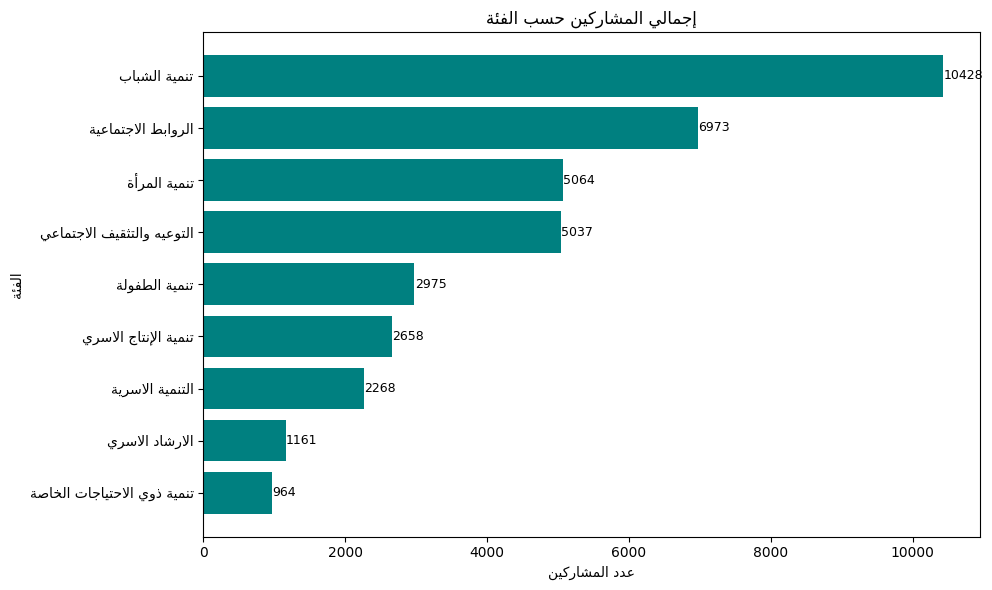

In [ ]:
# تجميع البيانات حسب الفئة وجمع عدد المشاركين
df_grouped = df.groupby("الفئة")["عدد المشاركين"].sum().sort_values()

# تجهيز النصوص العربية بشكل صحيح+ تعين كل عامود الى متغير
fields = df_grouped.index
fields = [get_display(arabic_reshaper.reshape(label)) for label in fields]
counts = df_grouped.values

# إنشاء الرسم
plt.figure(figsize=(10, 6))
bars = plt.barh(fields, counts, color='teal')
plt.title(get_display(arabic_reshaper.reshape('إجمالي المشاركين حسب الفئة')))
plt.xlabel(get_display(arabic_reshaper.reshape('عدد المشاركين')))
plt.ylabel(get_display(arabic_reshaper.reshape('الفئة')))
plt.tight_layout()

#  إضافة الأرقام على يمين كل عمود
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5,                        # مكان الرقم بجانب نهاية العمود
             bar.get_y() + bar.get_height()/2, # وسط العمود عمودياً
             str(int(width)),                  # تحويل الرقم إلى عدد صحيح
             va='center', fontsize=9
             )

plt.show()


##**نسبة المشاركين حسب الفئة**






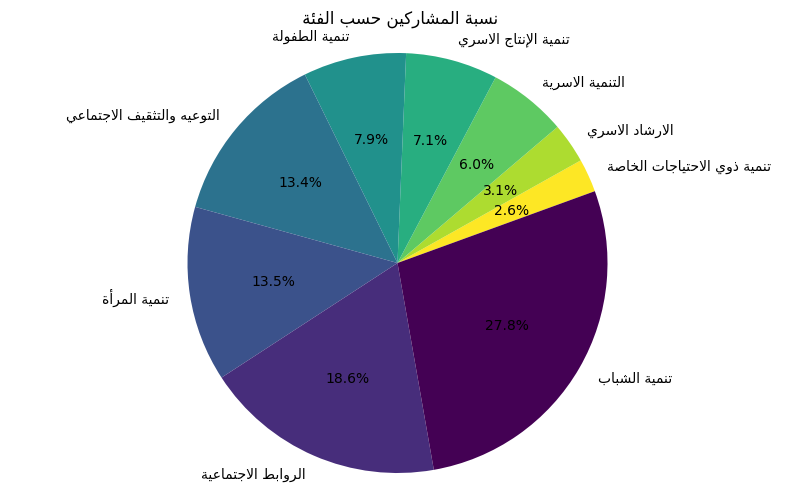

In [ ]:

# تعيين قيمة الحقل ليكون باللغة العربية
fields =df_grouped.index
fields = [get_display(arabic_reshaper.reshape(label)) for label in fields]
# تعيين قيمة العدد
count = df_grouped.values
colors = cm.viridis(np.linspace(1,0,len(count))) #تغيير الالوان
#رسم الشكل
plt.figure(figsize=(10, 6))
plt.pie(count,colors=colors, labels=fields,autopct='%1.1f%%', startangle=20)
plt.title(get_display(arabic_reshaper.reshape('نسبة المشاركين حسب الفئة ')))
plt.axis('equal')
plt.show()

##**أعلى  10 مشاريع من حيث عدد المشاركين**


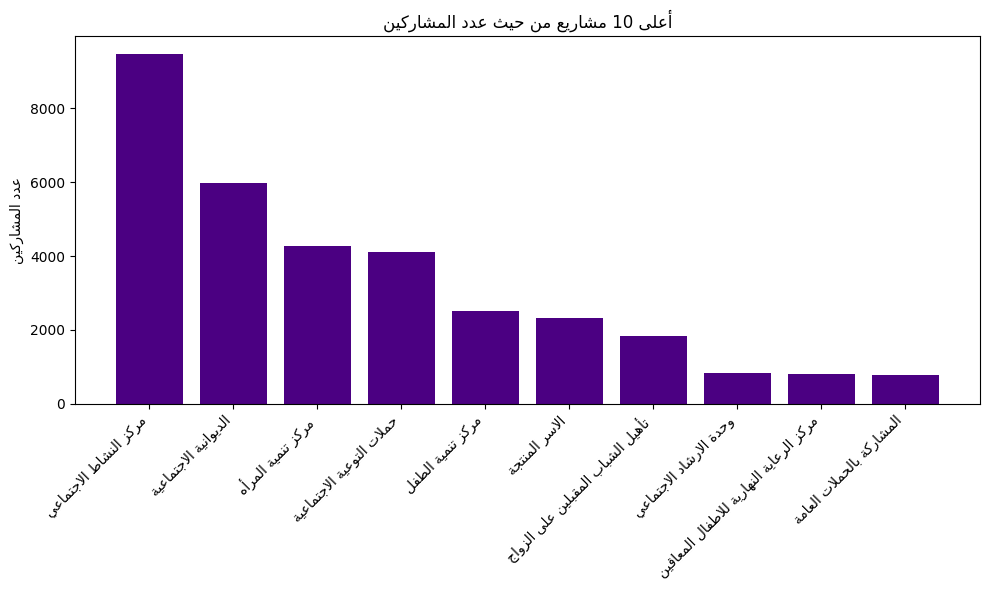

In [ ]:
# تجميع وترتيب البيانات
top_projects = df.groupby("المشاريع")["عدد المشاركين"].sum().sort_values(ascending=False).head(10)

fields = top_projects.index
fields = [get_display(arabic_reshaper.reshape(label)) for label in fields]
counts = top_projects.values

# رسم بياني عمودي
plt.figure(figsize=(10, 6))
bars = plt.bar(fields, counts, color='indigo')
plt.title(get_display(arabic_reshaper.reshape("أعلى 10 مشاريع من حيث عدد المشاركين")))
plt.ylabel(get_display(arabic_reshaper.reshape("عدد المشاركين")))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##**العلاقة بين الفئات والمشاريع حسب عدد المشاركين**


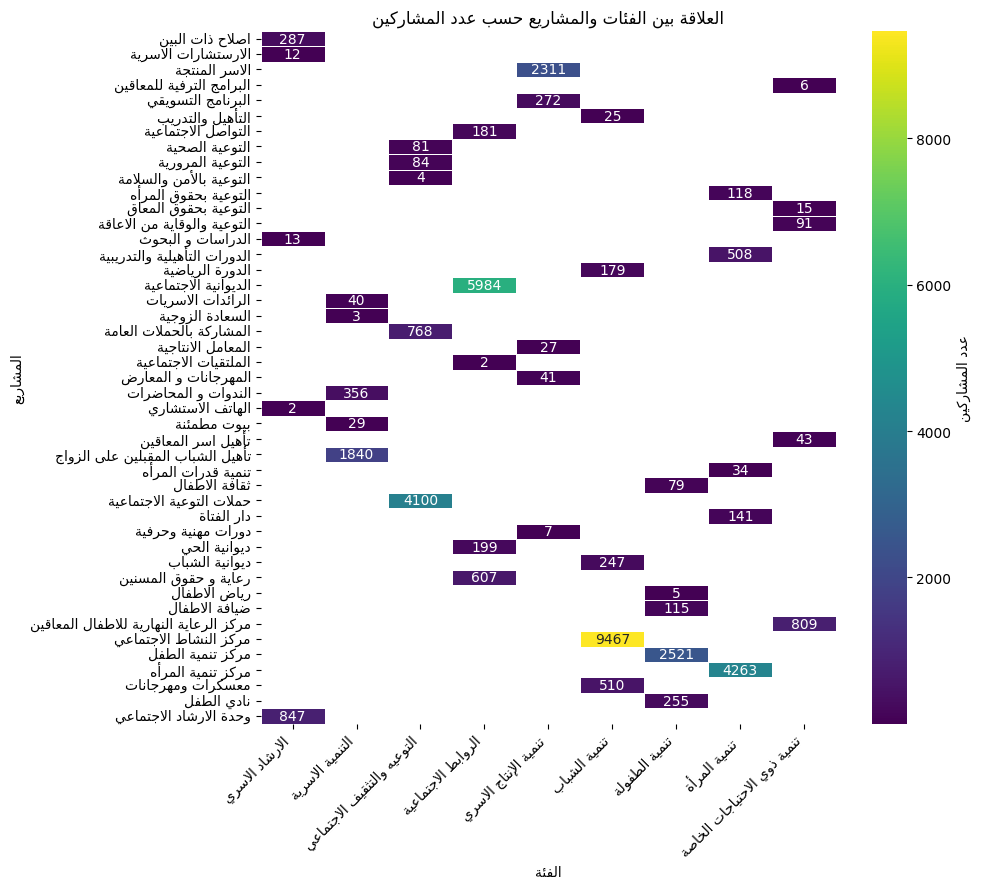

In [ ]:
# انشاء pivot table
pivot = df.pivot_table(index="المشاريع", columns="الفئة", values="عدد المشاركين")
#  تحويل النصوص العربية بشكل صحيح
pivot.columns = [get_display(arabic_reshaper.reshape(str(col))) for col in pivot.columns]
pivot.index = [get_display(arabic_reshaper.reshape(str(row))) for row in pivot.index]

# heatmap الرسم
plt.figure(figsize=(10, 9))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5,
            cbar_kws={'label': get_display(arabic_reshaper.reshape('عدد المشاركين'))})
annot_kws={"size": 3}
plt.title(get_display(arabic_reshaper.reshape("العلاقة بين الفئات والمشاريع حسب عدد المشاركين")))
plt.xlabel(get_display(arabic_reshaper.reshape("الفئة")))
plt.ylabel(get_display(arabic_reshaper.reshape("المشاريع")))
plt.xticks( rotation=45,ha='right')

plt.tight_layout()
plt.show()




##**تحليل تنبؤي افتراضي لعدد المشاركين في أحد الأنشطة**


' تنبؤ لعدد المشاركين في النشاط :'الديوانية الاجتماعية
 في السنة السادسة: حوالي 6582 مشارك 


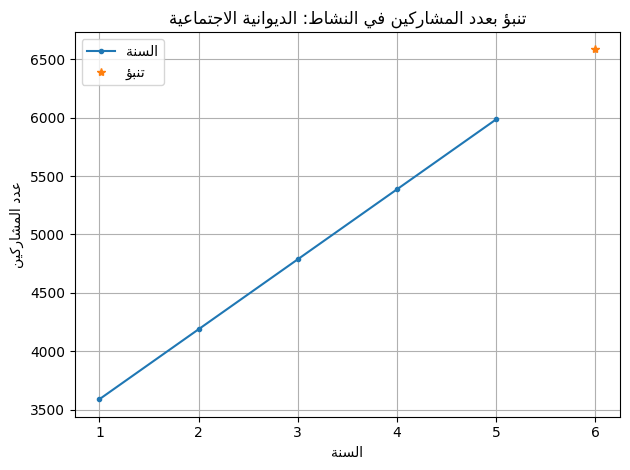

In [ ]:

df.columns = ['الفئة','المشاريع','عدد المشاركين']

# نختار النشاط الأكثر مشاركة
top_activity = df.sort_values(by='عدد المشاركين',
            ascending=False).iloc[1] # بتغيير قيمة العدد يمكن اختيار الفئة المراد اظها التوقع لها
activity_name = top_activity['المشاريع']
participants_now = top_activity['عدد المشاركين']

# بيانات السنوات السابقة (تجريبية)
years = np.array([1, 2, 3,4,5]).reshape(-1, 1)
participants = np.array([
  participants_now * 0.6,
   participants_now * 0.7,
   participants_now * 0.8,
   participants_now * 0.9,
  participants_now
]).reshape(-1, 1)

# نموذج الانحدار الخطي
model = LinearRegression()
model.fit(years, participants)

# تنبؤ للسنة القادمة
next_year = np.array([[6]])
predicted = model.predict(next_year)[0][0]

print(f"' تنبؤ لعدد المشاركين في النشاط :'{activity_name}")
print(f" في السنة السادسة: حوالي {int(predicted)} مشارك ")

# رسم بياني

plt.plot(years, participants, marker='.', label=get_display(arabic_reshaper.reshape("السنة")))
plt.plot(next_year, predicted, '*', label=get_display(arabic_reshaper.reshape("تنبؤ")))

plt.title(get_display(arabic_reshaper.reshape(f"تنبؤ بعدد المشاركين في النشاط: {activity_name}")))
plt.xlabel(get_display(arabic_reshaper.reshape("السنة")))
plt.ylabel(get_display(arabic_reshaper.reshape("عدد المشاركين")))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

البيانات ليست أرقامًا فقط...
بل هي صوت المجتمع، وعلينا الاستماع جيدًا لنصنع الأثر الحقيقي